In [1]:
import sklearn as sk

In [2]:
import matplotlib
import seaborn as sb
import tensorflow as tf
import pandas as pd
import csv as csv


In [5]:
top50 = pd.read_csv('/content/Top-50-musicality-global 3.csv')
print(top50)

      Unnamed: 0 Country                                         Track Name  \
0              0  Global                               Standing Next to You   
1              1  Global                                             greedy   
2              2  Global                                        Si No Estás   
3              3  Global                Seven (feat. Latto) (Explicit Ver.)   
4              4  Global  Is It Over Now? (Taylor's Version) (From The V...   
...          ...     ...                                                ...   
3584        3584     VNM                                   Too Sad to Dance   
3585        3585     VNM                           tình yêu có nghĩa là gì?   
3586        3586     VNM                                           You & Me   
3587        3587     VNM                                Shot Glass of Tears   
3588        3588     VNM                                         Thằng Điên   

         Artist Name                        Album N

In [6]:
t50 = top50.dropna()
print(t50)

      Unnamed: 0 Country                                         Track Name  \
0              0  Global                               Standing Next to You   
1              1  Global                                             greedy   
2              2  Global                                        Si No Estás   
3              3  Global                Seven (feat. Latto) (Explicit Ver.)   
4              4  Global  Is It Over Now? (Taylor's Version) (From The V...   
...          ...     ...                                                ...   
3584        3584     VNM                                   Too Sad to Dance   
3585        3585     VNM                           tình yêu có nghĩa là gì?   
3586        3586     VNM                                           You & Me   
3587        3587     VNM                                Shot Glass of Tears   
3588        3588     VNM                                         Thằng Điên   

         Artist Name                        Album N

In [7]:
t50.columns

Index(['Unnamed: 0', 'Country', 'Track Name', 'Artist Name', 'Album Name',
       'Popularity', 'Date', 'Markets', 'Danceability', 'Acousticness',
       'duration', 'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Loudness',
       'Mode', 'Speechiness', 'Tempo', 'TSignature', 'Positiveness'],
      dtype='object')

In [8]:
t50.head()

,Unnamed: 0,Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,...,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
0,0,Global,Standing Next to You,Jung Kook,GOLDEN,91,2023-11-03,AR,0.711,0.0447,...,0.809,0.0,2,0.3390,-4.389,0,0.0955,106.017,4,0.816
1,1,Global,greedy,Tate McRae,greedy,100,2023-09-15,AR,0.750,0.2560,...,0.733,0.0,6,0.1140,-3.180,0,0.0319,111.018,1,0.844
2,2,Global,Si No Estás,iñigo quintero,Si No Estás,99,2022-09-23,AR,0.537,0.8270,...,0.421,0.0,5,0.1380,-8.720,1,0.0285,98.224,4,0.524
3,3,Global,Seven (feat. Latto) (Explicit Ver.),Jung Kook,GOLDEN,82,2023-11-03,AR,0.790,0.3120,...,0.831,0.0,11,0.0797,-4.185,1,0.0440,124.987,4,0.872
4,4,Global,Is It Over Now? (Taylor's Version) (From The V...,Taylor Swift,1989 (Taylor's Version),93,2023-10-26,AR,0.596,0.0504,...,0.658,0.0,0,0.1270,-7.346,1,0.0360,100.012,4,0.176


In [10]:
unpopular = pd.read_csv('/content/unpopular_songs.csv')
up = unpopular.dropna()
up = up.drop_duplicates()
print(up)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.722   0.476    5    -8.203     1       0.0896       0.67000   
1            0.955   0.281    0   -11.392     0       0.4660       0.00480   
2            0.753   0.355    8   -11.799     1       0.5140       0.57300   
3            0.650   0.331    3   -10.818     0       0.3830       0.86500   
4            0.690   0.360    4   -15.624     0       0.4550       0.76400   
...            ...     ...  ...       ...   ...          ...           ...   
4068         0.862   0.578   10    -9.364     0       0.4430       0.01460   
4069         0.686   0.511    8   -10.253     0       0.4350       0.01010   
4070         0.725   0.555    8   -13.018     1       0.3910       0.00189   
4071         0.763   0.534    1    -8.889     1       0.3170       0.00531   
4072         0.724   0.558    1   -10.324     1       0.5060       0.06630   

      instrumentalness  liveness  valence    tempo  duration_ms

In [11]:
up.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'explicit', 'popularity', 'track_name', 'track_artist',
       'track_id'],
      dtype='object')

In [12]:
up.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.722,0.476,5,-8.203,1,0.0896,0.6700,0.0000,0.0926,0.9270,151.968,220549,False,8,Este Corazón,El Javi,0Z4UqiPI5c4dMJ5iPyO61d
1,0.955,0.281,0,-11.392,0,0.4660,0.0048,0.0595,0.1220,0.0934,127.991,149543,True,0,thinking and doing,Br80,568FGhLEnSZhl82t0YmQ96
2,0.753,0.355,8,-11.799,1,0.5140,0.5730,0.0000,0.0735,0.6000,91.978,130019,True,0,Puzzlement,JpThaRuler,4Lex8QZVkptfw2PZtjoXlp
3,0.650,0.331,3,-10.818,0,0.3830,0.8650,0.0000,0.1050,0.5810,99.513,116193,True,0,Sensi,JpThaRuler,4pMqXl6EfmZrodPMYHUq9Z
4,0.690,0.360,4,-15.624,0,0.4550,0.7640,0.0000,0.1810,0.1050,89.893,111827,True,0,Rass,JpThaRuler,2pvQEKHtlkHb6ijMwcMuKV


In [13]:
# prompt: Using dataframe up: suggest a plot

import altair as alt

chart = alt.Chart(up).mark_point().encode(
    alt.X('danceability'),
    alt.Y('energy'),
    color = 'key',
    size = alt.Size('popularity')
).interactive()

chart


alt.Chart(...)

<ipython-input-14-d3af5395a83b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(up, x='key', y='explicit', inner='box', palette='Dark2')


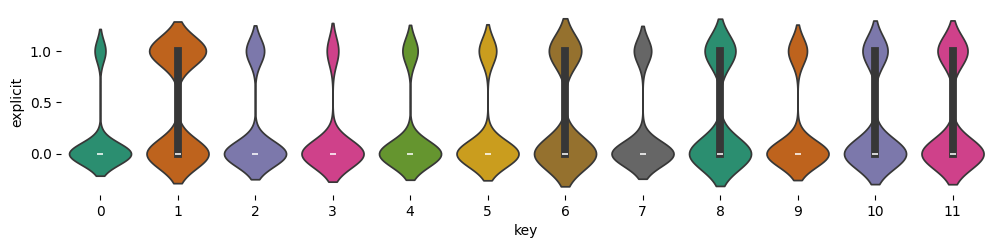

In [ ]:
# @title explicit vs key

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(up['explicit'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(up, x='key', y='explicit', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
t100 = pd.read_csv('/Spotify 2010 - 2019 Top 100.csv')
t100 = t100.dropna()
t100 = t100.drop_duplicates()
print(t100)

                                             title              artist  \
0                    STARSTRUKK (feat. Katy Perry)               3OH!3   
1                      My First Kiss (feat. Ke$ha)               3OH!3   
2                                  I Need A Dollar          Aloe Blacc   
3    Airplanes (feat. Hayley Williams of Paramore)               B.o.B   
4                Nothin' on You (feat. Bruno Mars)               B.o.B   
..                                             ...                 ...   
995                                     SICKO MODE        Travis Scott   
996                                      EARFQUAKE  Tyler, The Creator   
997                      Boasty (feat. Idris Elba)               Wiley   
998                    Strike a Pose (feat. Aitch)    Young T & Bugsey   
999      The London (feat. J. Cole & Travis Scott)          Young Thug   

       top genre  year released       added    bpm  nrgy  dnce   dB  live  \
0      dance pop         2009.0  2

#Clustering with K-Means


Starting with the Top 50 spotify songs (Leftover from MTH 320 Project)

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [15]:
t50Col = t50[["Unnamed: 0", "Popularity", "Danceability", "Positiveness"]]
k = 8
kmeans = KMeans(n_clusters=k)
kmeans.fit(t50Col)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


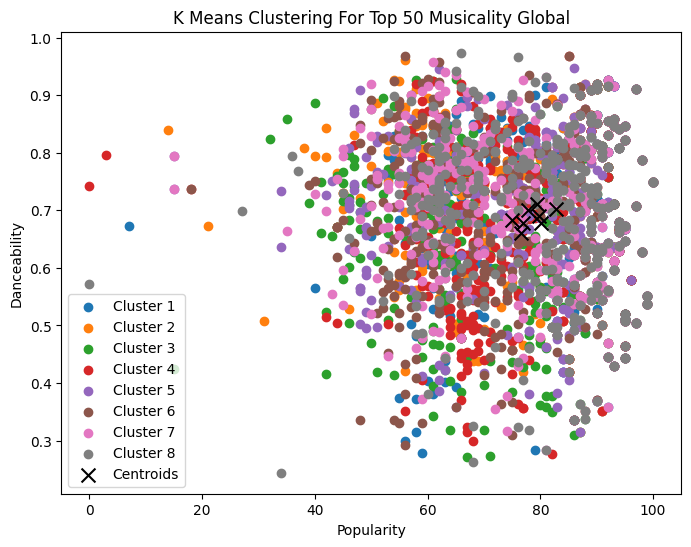

In [23]:
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(t50Col.values[labels == i, 1], t50Col.values[labels == i, 2],
                label=f'Cluster {i+1}')


plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=100, c='black',
            label='Centroids')

plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('K Means Clustering For Top 50 Musicality Global')
plt.legend()



In [42]:
up = up.rename(columns={'Unnamed: 0': 'ID'})

In [33]:
print(up)

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.722   0.476    5    -8.203     1       0.0896       0.67000   
1            0.955   0.281    0   -11.392     0       0.4660       0.00480   
2            0.753   0.355    8   -11.799     1       0.5140       0.57300   
3            0.650   0.331    3   -10.818     0       0.3830       0.86500   
4            0.690   0.360    4   -15.624     0       0.4550       0.76400   
...            ...     ...  ...       ...   ...          ...           ...   
4068         0.862   0.578   10    -9.364     0       0.4430       0.01460   
4069         0.686   0.511    8   -10.253     0       0.4350       0.01010   
4070         0.725   0.555    8   -13.018     1       0.3910       0.00189   
4071         0.763   0.534    1    -8.889     1       0.3170       0.00531   
4072         0.724   0.558    1   -10.324     1       0.5060       0.06630   

      instrumentalness  liveness  valence    tempo  duration_ms

In [50]:
# Extracting the desired columns
unpCol = up[["danceability", "energy", "speechiness", "instrumentalness", "popularity"]]

# Number of clusters
k = 8

# KMeans clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(unpCol)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


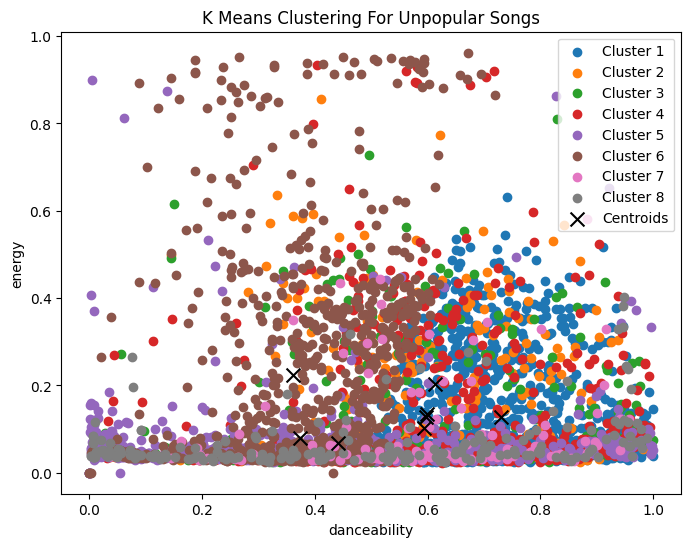

In [51]:
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(unpCol.values[labels == i, 1], unpCol.values[labels == i, 2],
                label=f'Cluster {i+1}')


plt.scatter(centroids[:, 1], centroids[:, 2], marker='x', s=100, c='black',
            label='Centroids')

plt.xlabel('danceability')
plt.ylabel('energy')
plt.title('K Means Clustering For Unpopular Songs')
plt.legend()



In [52]:
import seaborn as sns

<ipython-input-53-e96d502278a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unpCol['Cluster'] = labels


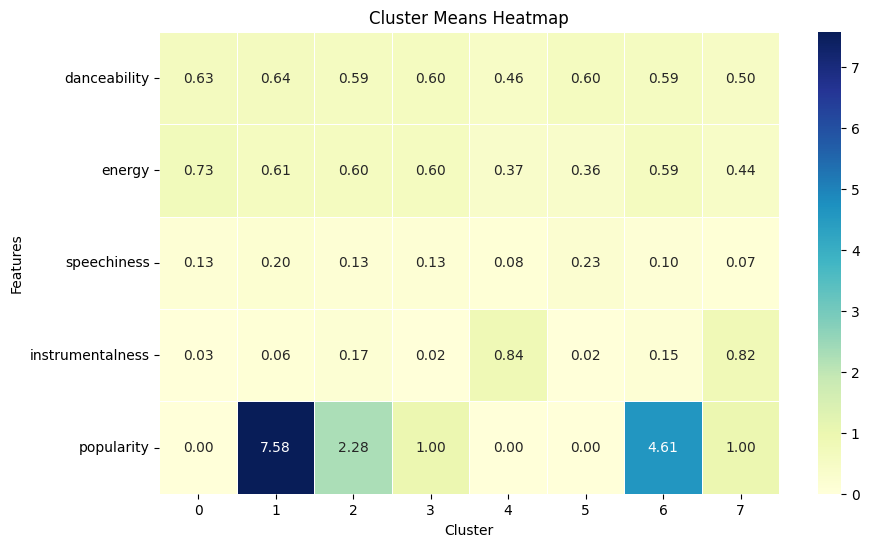

In [53]:
unpCol['Cluster'] = labels

# Calculating the mean of each cluster
cluster_means = unpCol.groupby('Cluster').mean()

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)
plt.title('Cluster Means Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()